# Customer churn estimation


## Problem Statement:
For any customer centric organization, customer churn/retention analysis is going to be
extremely valuable. It is a market reality that the banks and other financial institutions are
battling to attract each other's customers while retaining their own. Thus, Customer churn
reduction is the central concern of most banking organizations as switching costs to the
customer are low and acquisition cost to the organization is high. Churn reduces profitability
as it means potential loss of future revenue and also losing the invested costs of acquisition.
On the other hand, long term customers contribute to profitability through mere continued
association as they are less costly to serve and through additional services and referrals. It
is important to have data that underlies construction of purchase decision and also the
underlying loyalty hooks. So a good deal of marketing budget is allocated to engage
customer on an ongoing basis and prevent churn by designing new plans and offering
freebees, discounts etc. Thus, it is important to predict the customers who are likely to churn
and develop appropriate modalities for retention.
An international bank has a business problem with customer retention and observed high
churn rates. The bank observed that alarming number of existing customers exit while it is
getting increasingly difficult to acquire new customers. So they want to understand the
hidden patterns in their customer behaviour by use of customer data which has early warning
signs.This helps understand the drivers behind considering an alternative. The variables
could be demographic, perception or behavioural.

## column description


1. CustomerID: Unique customer ID
2. CustomerName: Name of the customer
3. yearofBirth: customer year of birth
4. monthofBirth: customer's month of birth
5. dayofbirth: customers's day of birth
6. Yearofentry: year in which customer has entered the company
7. monthofentry: month in which customer has entered the company
8. dayofentry: day the customer entered the company
9. Gender: gender of the customer
10. Location: branch location of the company
11. Education: level of education of the customer
12. MaritalStatus: marital status of customer
13. Occupation: occupation of the customer
14. Ownhouse: does customer have a own house
15. Creditscore: credit score of the customer
16. AccountBalance: balance available in customers account
17. NumberOfProducts: number of products that customer is associated to
18. IsCreditCardCustomer: does customer own a credit card
19. ActiveMember: is the customer active
20. Salary: salary of the customer
21. Churn: weather the customer has churned or no


In [0]:
#importing required packages 
import pandas as pd  #for dealing with dataframes
import numpy as np   #for better numerical operations
from sklearn.model_selection import train_test_split #to split data into train and validation
from sklearn.preprocessing import StandardScaler #to standardize the numerical data with mean=0 and std_dev=1
import matplotlib.pyplot as plt #to deal with plots
import seaborn as sns #to get better and user friendly plots
import datetime  #to deal with date and time
from datetime import timedelta  #to get change in time between two timestamps
from sklearn.metrics import classification_report,accuracy_score   #to get classification report and accuracy of models

In [0]:
train=pd.read_excel('Train.xlsx')
test=pd.read_excel('Test.xlsx')

In [0]:
test_id=test['CustomerID']

In [0]:
train,val=train_test_split(train,test_size=0.15,random_state=1)


In [0]:
def compare_train_val_test(train_df,val_df,test_df):
    train_levels=train_df.apply(lambda x: set(x.unique()),axis=0)   #finding differnt levels in different partitions
    val_levels=val_df.apply(lambda x: set(x.unique()),axis=0)
    test_levels=test_df.apply(lambda x:set(x.unique()),axis=0)
    val_extra=[]
    val_missing=[]
    test_extra=[]
    test_missing=[]
    for x1,x2,x3 in zip(train_levels,val_levels,test_levels):
        val_missing.append(x1-x2)
        val_extra.append(x2-x1)
        test_missing.append(x1-x3)
        test_extra.append(x3-x1)
    return pd.DataFrame({'train data types':train_df.dtypes,'val data types':val_df.dtypes,'test data types':test_df.dtypes,
                        'train_missing':train_df.isnull().sum(),'val_missing':val_df.isnull().sum(),'test_missing':test_df.isnull().sum(),
                        '#training levels':train_df.apply(lambda x: x.unique().shape[0],axis=0),
                        '#validation levels':val_df.apply(lambda x: x.unique().shape[0],axis=0),
                        '#testing levels':test_df.apply(lambda x: x.unique().shape[0],axis=0),
                        'val_missing_levels':val_missing,'val_extra_levels':val_extra,'test_missing_levels':test_missing,
                        'test_extra_levels':test_extra})

In [6]:
compare_train_val_test(train.loc[:,train.columns!='Churn'],val.loc[:,val.columns!='Churn'],test)

,train data types,val data types,test data types,train_missing,val_missing,test_missing,#training levels,#validation levels,#testing levels,val_missing_levels,val_extra_levels,test_missing_levels,test_extra_levels
CustomerID,object,object,object,0,0,0,6256,1104,1840,"{C6311419, C7039807, C8625785, C6896177, C7105...","{C3320837, C4725359, C4988314, C5996300, C4078...","{C7105892, C5768360, C5257264, C7916990, C8024...","{C5865251, C7899814, C8536455, C6015245, C5038..."
CustomerName,object,object,object,0,0,0,6256,1104,1840,"{Name_2864398, Name_2078515, Name_3602193, Nam...","{Name_7157055, Name_8904593, Name_3036334, Nam...","{Name_5048731, Name_3368789, Name_8625785, Nam...","{Name_6685983, Name_3430561, Name_3935059, Nam..."
yearofBirth,int64,int64,int64,0,0,0,69,60,62,"{1926, 1930, 1933, 1935, 1936, 1937, 1999, 193...",{1934},"{1926, 1930, 1933, 1935, 1936, 1938, 1945}",{}
monthofBirth,int64,int64,int64,0,0,0,12,12,12,{},{},{},{}
dayofBirth,int64,int64,int64,0,0,0,28,28,28,{},{},{},{}
yearofEntry,int64,int64,int64,0,0,0,11,11,11,{},{},{},{}
monthofEntry,int64,int64,int64,0,0,0,12,12,12,{},{},{},{}
dayofEntry,int64,int64,int64,0,0,0,28,28,28,{},{},{},{}
Gender,object,object,object,0,0,0,2,2,2,{},{},{},{}
Location,object,object,object,0,0,0,3,3,3,{},{},{},{}


In [7]:
train.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
3986,C6317442,Name_6317442,1981,12,9,2018,3,19,Female,Location12,primary,single,admin.,no,751,151218.98,1,1,1,109309.29,No
79,C8592095,Name_8592095,1975,11,21,2016,4,20,Male,Location11,primary,married,technician,yes,632,100013.51,1,1,0,24275.32,No
2512,C4370149,Name_4370149,1974,6,4,2013,8,25,Female,Location12,unknown,divorced,admin.,no,667,140406.68,2,0,1,57164.19,No
662,C2964384,Name_2964384,1979,6,24,2008,9,14,Female,Location13,unknown,single,admin.,no,850,0.00,2,1,1,143030.09,No
7259,C8118486,Name_8118486,1987,12,21,2011,4,17,Male,Location13,secondary,divorced,technician,no,685,122449.31,2,1,1,180769.55,No


In [8]:
print('shape of train:',train.shape)
print('shape of validation:',val.shape)
print('shape of test:',test.shape)

shape of train: (6256, 21)
shape of validation: (1104, 21)
shape of test: (1840, 20)


In [9]:
train.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                    object
dtype: object

In [10]:
train.describe(include='all')

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,6256,6256,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256,6256,6256,6256,6256,6256,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256
unique,6256,6256,NaN,NaN,NaN,NaN,NaN,NaN,2,3,4,3,7,3,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C2705882,Name_4650236,NaN,NaN,NaN,NaN,NaN,NaN,Male,Location11,primary,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3414,3123,1586,2185,2702,3134,NaN,NaN,NaN,NaN,NaN,NaN,4979
mean,NaN,NaN,1979.044277,6.541560,14.607257,2013.004316,6.466912,14.508951,NaN,NaN,NaN,NaN,NaN,NaN,651.556905,76155.918055,1.520780,0.705243,0.506394,99459.800777,NaN
std,NaN,NaN,10.494037,3.436141,8.048117,2.895375,3.432369,8.067615,NaN,NaN,NaN,NaN,NaN,NaN,96.556730,62321.558343,0.577945,0.455970,0.499999,57332.516626,NaN
min,NaN,NaN,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,NaN
25%,NaN,NaN,1974.000000,4.000000,8.000000,2011.000000,4.000000,7.750000,NaN,NaN,NaN,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,50403.620000,NaN
50%,NaN,NaN,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,653.000000,96472.395000,1.000000,1.000000,1.000000,98940.675000,NaN
75%,NaN,NaN,1986.000000,10.000000,22.000000,2016.000000,9.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,718.000000,127202.515000,2.000000,1.000000,1.000000,148784.170000,NaN


In [11]:
train.isnull().sum()

CustomerID              0
CustomerName            0
yearofBirth             0
monthofBirth            0
dayofBirth              0
yearofEntry             0
monthofEntry            0
dayofEntry              0
Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
dtype: int64

(1920, 2019)

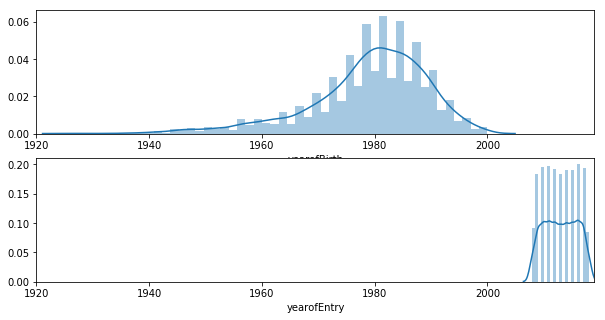

In [12]:
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(2,1,1)
sns.distplot(train.yearofBirth)
plt.xlim(1920,2019)
plt.subplot(2,1,2)
sns.distplot(train.yearofEntry)
plt.xlim(1920,2019)

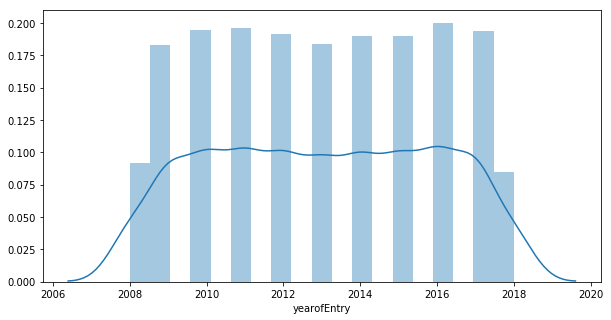

In [13]:
sns.distplot(train.yearofEntry)

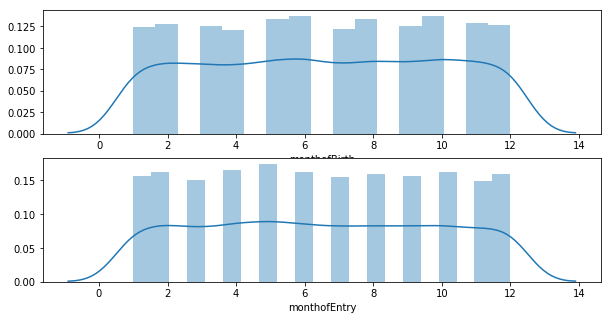

In [14]:
plt.subplot(2,1,1)
sns.distplot(train.monthofBirth)
plt.subplot(2,1,2)
sns.distplot(train.monthofEntry)

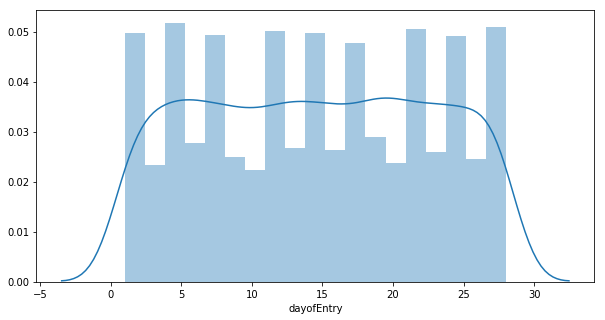

In [15]:
sns.distplot(train.dayofEntry)

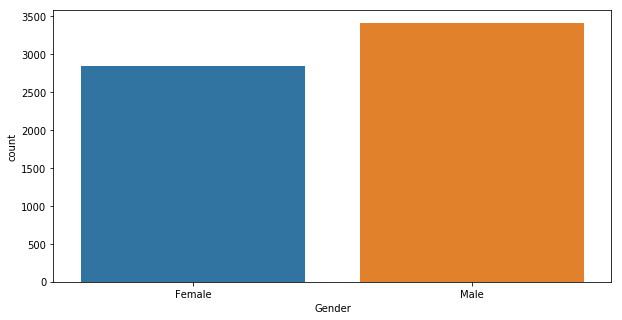

In [16]:
sns.countplot('Gender',data=train)

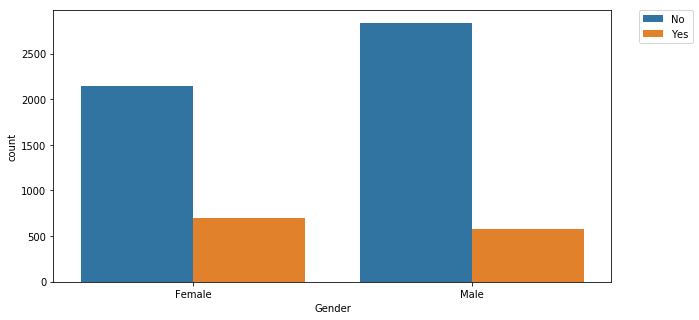

In [17]:
sns.countplot('Gender',data=train,hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

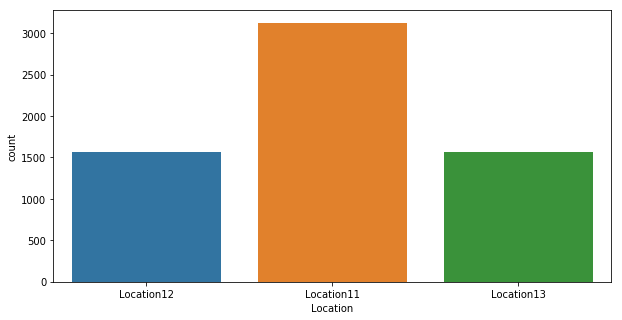

In [18]:
sns.countplot('Location',data=train)

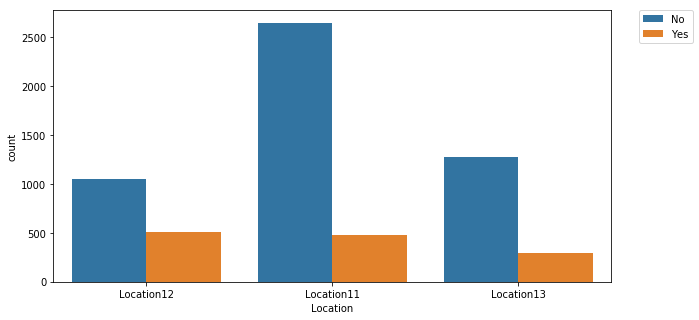

In [19]:
sns.countplot('Location',data=train,hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

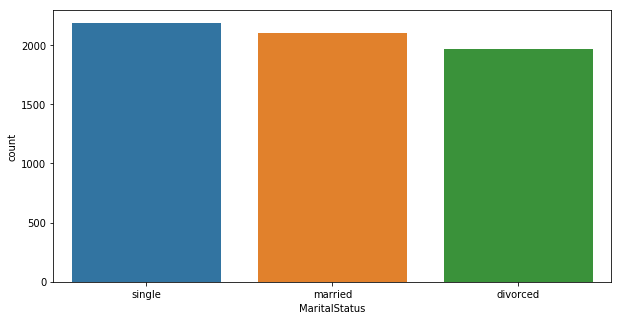

In [20]:
sns.countplot('MaritalStatus',data=train)

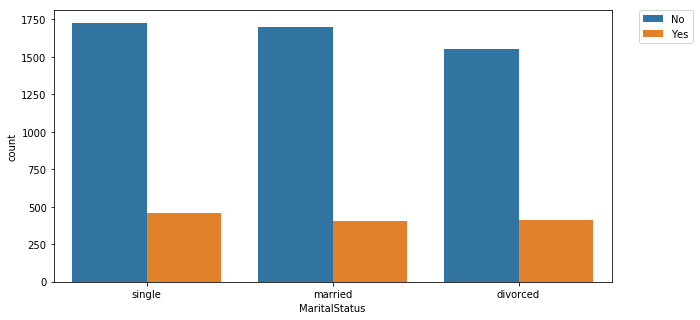

In [21]:
sns.countplot('MaritalStatus',data=train,hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

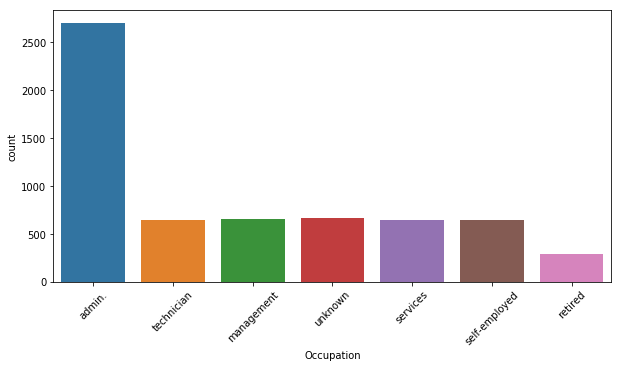

In [22]:
sns.countplot('Occupation',data=train)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

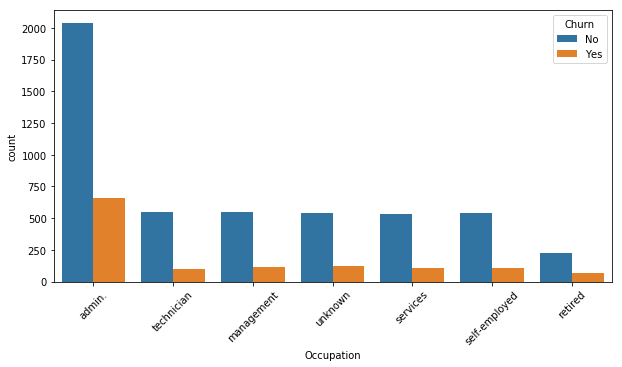

In [23]:
sns.countplot('Occupation',data=train,hue='Churn')
plt.xticks(rotation=45)

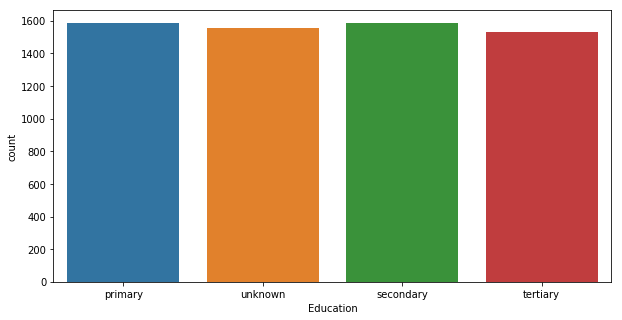

In [24]:
sns.countplot(x='Education',data=train)

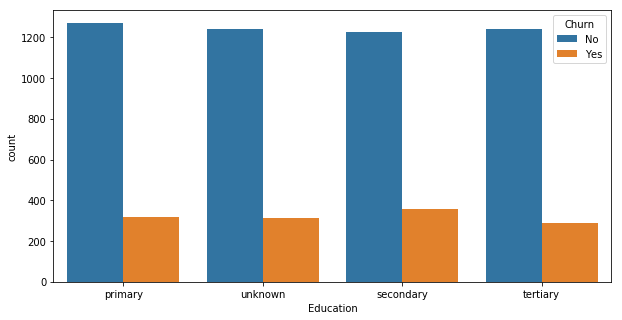

In [25]:
sns.countplot(x='Education',data=train,hue='Churn')

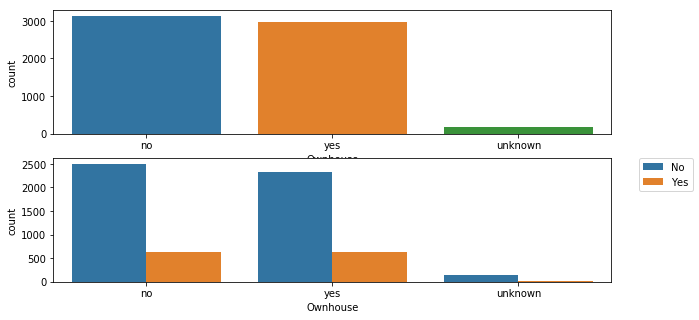

In [26]:
plt.subplot(2,1,1)
sns.countplot('Ownhouse',data=train)
plt.subplot(2,1,2)
sns.countplot('Ownhouse',data=train,hue='Churn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

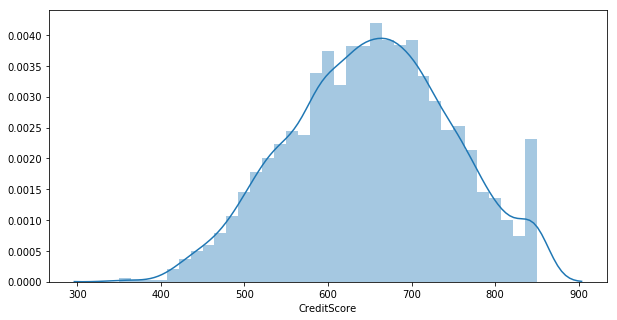

In [27]:
sns.distplot(train.CreditScore)

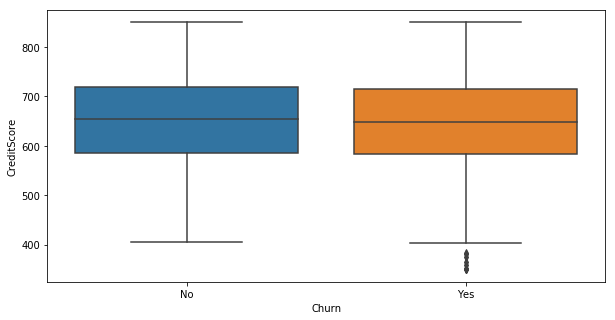

In [93]:
sns.boxplot(x='Churn',y='CreditScore',data=train)

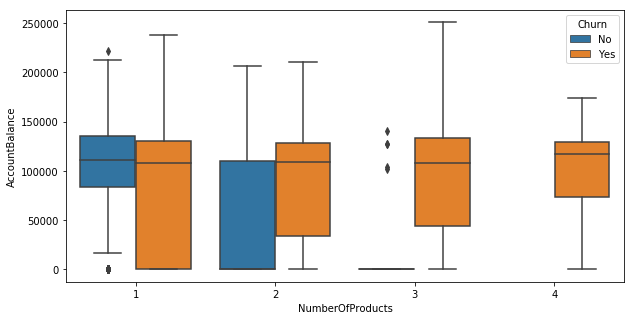

In [29]:
sns.boxplot(x='NumberOfProducts',y='AccountBalance',hue='Churn',data=train)

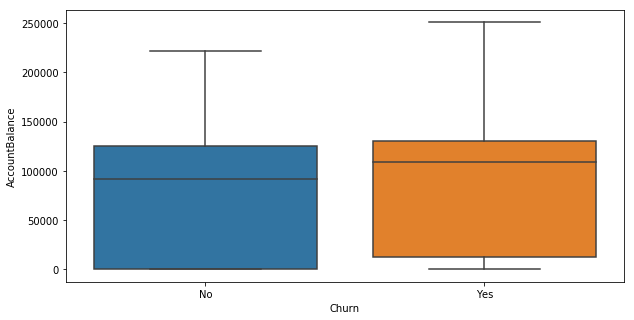

In [117]:
sns.boxplot(x='Churn',y='AccountBalance',data=train)

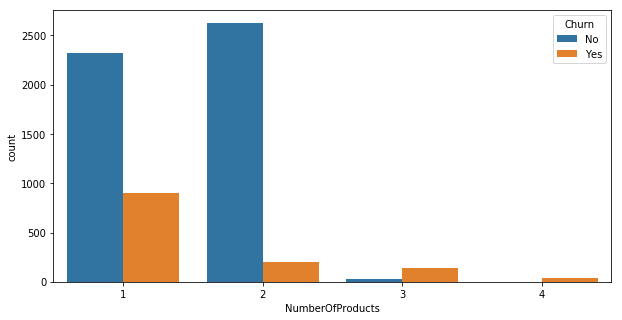

In [30]:
sns.countplot(x='NumberOfProducts',data=train,hue='Churn')

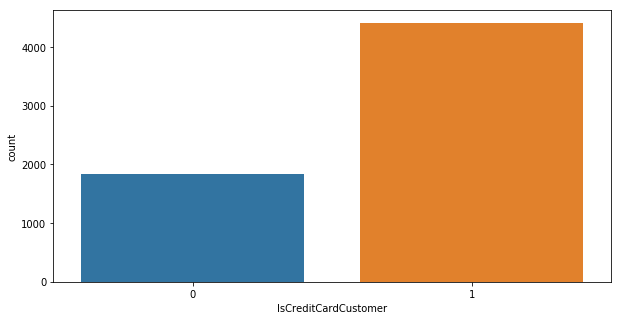

In [31]:
sns.countplot('IsCreditCardCustomer',data=train)

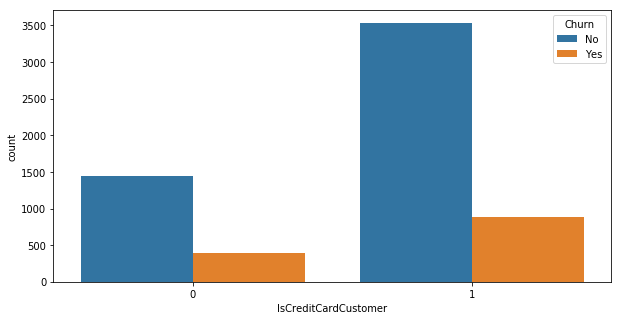

In [32]:
sns.countplot('IsCreditCardCustomer',data=train,hue='Churn')

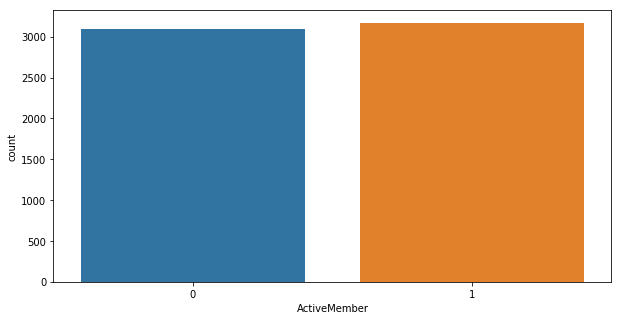

In [33]:
sns.countplot(x='ActiveMember',data=train)

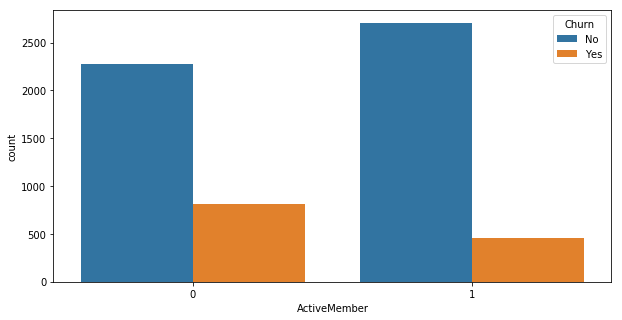

In [34]:
sns.countplot(x='ActiveMember',data=train,hue='Churn')

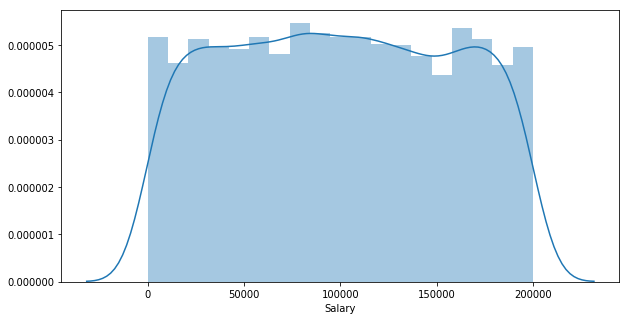

In [35]:
sns.distplot(train.Salary)

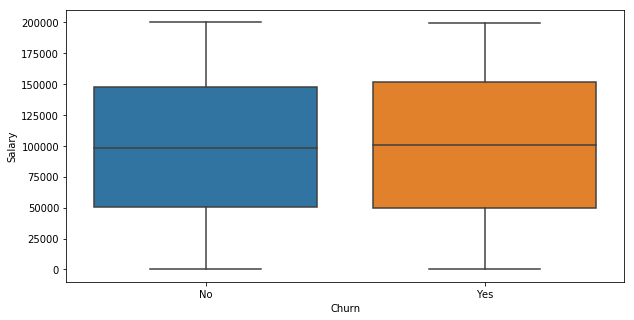

In [36]:
sns.boxplot(x='Churn',y='Salary',data=train)

In [0]:
def date_related(df):
  df['yearofBirth']=(df.loc[:,'yearofBirth']).astype('str')
  df['monthofBirth']=(df.loc[:,'monthofBirth']).astype('str')
  df['dayofBirth']=(df.loc[:,'dayofBirth']).astype('str')
  df['yearofEntry']=(df.loc[:,'yearofEntry']).astype('str')
  df['monthofEntry']=(df.loc[:,'monthofEntry']).astype('str')
  df['dayofEntry']=(df.loc[:,'dayofEntry']).astype('str')


  df['customer_dob'] = df[['yearofBirth', 'monthofBirth','dayofBirth']].apply(lambda x: '-'.join(x), axis=1)  
  df['customer_entry'] = df[['yearofEntry', 'monthofEntry','dayofEntry']].apply(lambda x: '-'.join(x), axis=1)


  df['customer_dob']=pd.to_datetime(df.loc[:,'customer_dob']) 
  df['customer_entry']=pd.to_datetime(df.loc[:,'customer_entry']) 



  cols=['yearofBirth','monthofBirth','dayofBirth','yearofEntry','monthofEntry','dayofEntry']
  df.drop(cols,axis=1,inplace=True)


  latest_entry=np.max(df.customer_entry)


  df['age_when_entered']=round(((df.customer_entry-df.customer_dob).astype('timedelta64[h]').abs())/8760,2)
  df['time_spent_with_company']=round(((latest_entry-df.customer_entry).astype('timedelta64[h]').abs())/8760,2)
  df['customer_age']=df['age_when_entered']+df['time_spent_with_company']



  return df 	 	

In [116]:
train=date_related(train)
val=date_related(val)
test=date_related(test)

KeyError: ignored

In [39]:
train.dtypes

CustomerID                         object
CustomerName                       object
Gender                             object
Location                           object
Education                          object
MaritalStatus                      object
Occupation                         object
Ownhouse                           object
CreditScore                         int64
AccountBalance                    float64
NumberOfProducts                    int64
IsCreditCardCustomer                int64
ActiveMember                        int64
Salary                            float64
Churn                              object
customer_dob               datetime64[ns]
customer_entry             datetime64[ns]
age_when_entered                  float64
time_spent_with_company           float64
dtype: object

In [40]:
train.describe(include='all')

,CustomerID,CustomerName,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,customer_dob,customer_entry,age_when_entered,time_spent_with_company
count,6256,6256,6256,6256,6256,6256,6256,6256,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256,6256,6256,6256.000000,6256.000000
unique,6256,6256,2,3,4,3,7,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4835,2968,NaN,NaN
top,C2705882,Name_4650236,Male,Location11,primary,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,No,1973-03-24 00:00:00,2013-12-18 00:00:00,NaN,NaN
freq,1,1,3414,3123,1586,2185,2702,3134,NaN,NaN,NaN,NaN,NaN,NaN,4979,5,8,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926-05-13 00:00:00,2008-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-10 00:00:00,2018-12-28 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651.556905,76155.918055,1.520780,0.705243,0.506394,99459.800777,NaN,NaN,NaN,33.976873,5.497433
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.556730,62321.558343,0.577945,0.455970,0.499999,57332.516626,NaN,NaN,NaN,10.914879,2.913223
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,NaN,NaN,NaN,7.150000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,50403.620000,NaN,NaN,NaN,26.580000,2.980000


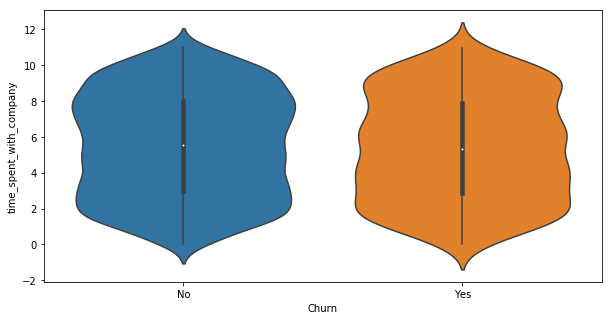

In [41]:
sns.violinplot(x='Churn',y='time_spent_with_company',data=train)

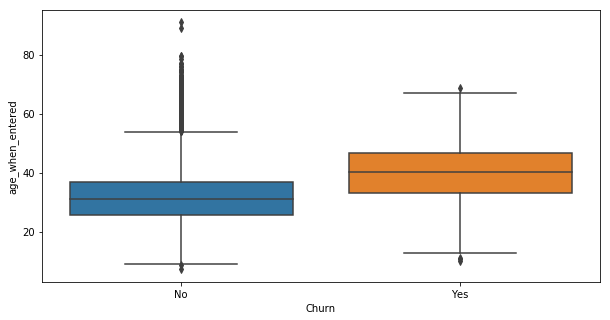

In [109]:
sns.boxplot(x='Churn',y='age_when_entered',data=train)

In [42]:
train.dtypes

CustomerID                         object
CustomerName                       object
Gender                             object
Location                           object
Education                          object
MaritalStatus                      object
Occupation                         object
Ownhouse                           object
CreditScore                         int64
AccountBalance                    float64
NumberOfProducts                    int64
IsCreditCardCustomer                int64
ActiveMember                        int64
Salary                            float64
Churn                              object
customer_dob               datetime64[ns]
customer_entry             datetime64[ns]
age_when_entered                  float64
time_spent_with_company           float64
dtype: object

In [0]:
def columns_train_val(df):
  unwanted_cols=['CustomerID','CustomerName','customer_dob','customer_entry']
  df.drop(unwanted_cols,axis=1,inplace=True)
  to_cat_cols=['Gender','Location','Education','MaritalStatus','Occupation','Ownhouse','NumberOfProducts','IsCreditCardCustomer','ActiveMember','Churn']
  df.loc[:,to_cat_cols]=df.loc[:,to_cat_cols].astype('category')
  return df

def columns_test(df):
  unwanted_cols=['CustomerID','CustomerName','customer_dob','customer_entry']
  df.drop(unwanted_cols,axis=1,inplace=True)
  to_cat_cols=['Gender','Location','Education','MaritalStatus','Occupation','Ownhouse','NumberOfProducts','IsCreditCardCustomer','ActiveMember']
  df.loc[:,to_cat_cols]=df.loc[:,to_cat_cols].astype('category')
  return df


In [44]:
train=columns_train_val(train)
val=columns_train_val(val)
test=columns_test(test)
train.dtypes

Gender                     category
Location                   category
Education                  category
MaritalStatus              category
Occupation                 category
Ownhouse                   category
CreditScore                   int64
AccountBalance              float64
NumberOfProducts           category
IsCreditCardCustomer       category
ActiveMember               category
Salary                      float64
Churn                      category
age_when_entered            float64
time_spent_with_company     float64
dtype: object

In [0]:
sns.boxplot(x='Churn',y='time_spent_with_company',data=train)

In [0]:
def splitting_y(df):
  df_x=df.loc[:,df.columns!='Churn']
  df_y=df['Churn']
  return df_x,df_y

In [0]:
train_x,train_y=splitting_y(train)
val_x,val_y=splitting_y(val)
test_x=test

In [47]:
print('train_x shape:',train_x.shape)
print('train_y shape:',train_y.shape)
print('val_x shape:',val_x.shape)
print('val_y shape:',val_y.shape)
print('test_x shape:',test_x.shape)

train_x shape: (6256, 14)
train_y shape: (6256,)
val_x shape: (1104, 14)
val_y shape: (1104,)
test_x shape: (1840, 14)


In [0]:
num_cols=['CreditScore','AccountBalance','Salary','age_when_entered','time_spent_with_company']
cat_cols=['Gender','Location','Education','MaritalStatus','Occupation','Ownhouse','NumberOfProducts','IsCreditCardCustomer','ActiveMember']

train_num_x=train_x.loc[:,num_cols]
train_cat_x=train_x.loc[:,cat_cols]
val_num_x=val_x.loc[:,num_cols]
val_cat_x=val_x.loc[:,cat_cols]
test_num_x=test_x.loc[:,num_cols]
test_cat_x=test_x.loc[:,cat_cols]

In [0]:
#standardizing the numerical columns using standardscaler()
scaler = StandardScaler()
scaler.fit(train_num_x[train_num_x.columns])
train_num_x[train_num_x.columns] = scaler.transform(train_num_x[train_num_x.columns])
val_num_x[val_num_x.columns] = scaler.transform(val_num_x[val_num_x.columns])
test_num_x[test_num_x.columns] = scaler.transform(test_num_x[test_num_x.columns])

In [50]:
train_num_x.describe()

,CreditScore,AccountBalance,Salary,age_when_entered,time_spent_with_company
count,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03
mean,3.691279e-18,1.465509e-16,8.848421e-17,3.815061e-17,-1.045271e-16
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00
min,-3.123356e+00,-1.222081e+00,-1.734725e+00,-2.458022e+00,-1.887213e+00
25%,-6.997162e-01,-1.222081e+00,-8.557116e-01,-6.777413e-01,-8.642093e-01
50%,1.494676e-02,3.260204e-01,-9.055372e-03,-1.399004e-01,7.747070e-03
75%,6.881799e-01,8.191496e-01,8.603898e-01,5.035389e-01,8.488073e-01
max,2.055361e+00,2.804104e+00,1.753263e+00,5.224766e+00,1.888976e+00


In [0]:
#creating dummy variables of categorical variables
train_dummy_x=pd.get_dummies(train_cat_x,drop_first=True)
val_dummy_x=pd.get_dummies(val_cat_x,drop_first=True)
test_dummy_x=pd.get_dummies(test_cat_x,drop_first=True)

In [0]:
#combining standardized numerical dataframe and dummyfied categorical dataframe.
full_train_x=pd.concat([train_num_x,train_dummy_x],axis=1)
full_val_x=pd.concat([val_num_x,val_dummy_x],axis=1)
full_test_x=pd.concat([test_num_x,test_dummy_x],axis=1)

In [53]:
full_train_x.describe()

,CreditScore,AccountBalance,Salary,age_when_entered,time_spent_with_company,Gender_Male,Location_Location12,Location_Location13,Education_secondary,Education_tertiary,Education_unknown,MaritalStatus_married,MaritalStatus_single,Occupation_management,Occupation_retired,Occupation_self-employed,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_unknown,Ownhouse_yes,NumberOfProducts_2,NumberOfProducts_3,NumberOfProducts_4,IsCreditCardCustomer_1,ActiveMember_1
count,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03,6.256000e+03,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000,6256.000000
mean,3.691279e-18,1.465509e-16,8.848421e-17,3.815061e-17,-1.045271e-16,0.545716,0.250000,0.250799,0.253197,0.244565,0.248721,0.336317,0.349265,0.105339,0.046835,0.103101,0.102941,0.103740,0.106138,0.026055,0.472986,0.452685,0.025895,0.005435,0.705243,0.506394
std,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,1.000080e+00,0.497945,0.433047,0.433508,0.434878,0.429863,0.432306,0.472487,0.476776,0.307014,0.211302,0.304115,0.303906,0.304948,0.308039,0.159312,0.499310,0.497796,0.158835,0.073526,0.455970,0.499999
min,-3.123356e+00,-1.222081e+00,-1.734725e+00,-2.458022e+00,-1.887213e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.997162e-01,-1.222081e+00,-8.557116e-01,-6.777413e-01,-8.642093e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.494676e-02,3.260204e-01,-9.055372e-03,-1.399004e-01,7.747070e-03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,6.881799e-01,8.191496e-01,8.603898e-01,5.035389e-01,8.488073e-01,1.000000,0.250000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.055361e+00,2.804104e+00,1.753263e+00,5.224766e+00,1.888976e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
print('full train_x shape:',full_train_x.shape)
print('full_val_x shape:',full_val_x.shape)
print('full_test_x shape:',full_test_x.shape)

full train_x shape: (6256, 26)
full_val_x shape: (1104, 26)
full_test_x shape: (1840, 26)


In [55]:
compare_train_val_test(full_train_x,full_val_x,full_test_x)

,train data types,val data types,test data types,train_missing,val_missing,test_missing,#training levels,#validation levels,#testing levels,val_missing_levels,val_extra_levels,test_missing_levels,test_extra_levels
CreditScore,float64,float64,float64,0,0,0,446,367,403,"{-0.8240053717996797, 1.4132003048047146, 1.73...","{-2.191186618613476, -3.0404961810281073, -2.3...","{1.5478469427484978, 2.0139314587077464, 1.993...","{-2.750488037764575, -2.657271134572725, -2.45..."
AccountBalance,float64,float64,float64,0,0,0,3989,718,1153,"{0.42630024206610884, 1.2139044752388273, 1.65...","{0.44703790222097783, 0.5427594624857779, 0.71...","{0.42630024206610884, 1.2139044752388273, 1.26...","{0.7923829286452575, 1.1551969825563377, 1.442..."
Salary,float64,float64,float64,0,0,0,6255,1104,1840,"{-0.56392230428564, 1.5492412276798575, 1.5537...","{-0.8014878154177669, 1.5390421858384604, 1.64...","{-0.56392230428564, 1.5492412276798575, -0.681...","{0.7377994651906405, 1.661182292450743, 0.6152..."
age_when_entered,float64,float64,float64,0,0,0,3118,932,1444,"{0.8249148763727021, 0.4556646036564871, 2.593...","{0.6755655104850025, 1.1391899223817887, 2.989...","{0.4556646036564871, 1.7063510112436688, 2.593...","{-0.5879484500005097, 1.2518891371314034, 2.40..."
time_spent_with_company,float64,float64,float64,0,0,0,1070,673,842,"{0.8762705295446995, 1.6452399168110956, 1.885...","{0.5158161292635758, 1.8340493645773988, 0.917...","{-0.5552483744289054, 1.885542850331845, -0.55...","{0.2308855080889734, 1.86151255697977, 1.83404..."
Gender_Male,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Location_Location12,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Location_Location13,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Education_secondary,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}
Education_tertiary,uint8,uint8,uint8,0,0,0,2,2,2,{},{},{},{}


## modelling
## DT

### function to create learning curves

In [0]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [68]:
#creating a random search for some hyper parameters given in param_grid_1
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
dt=tree.DecisionTreeClassifier()
DT_param_grid_1={
    'criterion':['gini','entropy'],
    'max_depth':np.arange(4,20,1),
    'min_samples_split':np.arange(0.001,0.1,0.01),
    'max_features':['log2','sqrt','auto'],
    'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
}
r_search=RandomizedSearchCV(dt,param_distributions=DT_param_grid_1,n_iter=1500,verbose=1,cv=5,n_jobs=-1)
r_search.fit(full_train_x,train_y)
r_search.best_params_

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1418 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 3418 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 6218 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:  1.6min finished


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 0.06099999999999999,
 'min_weight_fraction_leaf': 0.001}

In [0]:
DT_param_grid_2={
    'criterion':['gini','entropy'],
    'max_depth':(6,7,8,9,10),
    'min_samples_split':np.arange(0.02,0.1,0.0025),
    'max_features':['log2','sqrt','auto'],
    'min_weight_fraction_leaf':np.arange(0.0001,0.25,0.025)
}

In [70]:
dt=tree.DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid = DT_param_grid_2,cv=3,verbose=1,n_jobs=-1)
grid_search.fit(full_train_x,train_y)
grid_search.best_params_#getting best parameters of grid search

Fitting 3 folds for each of 9600 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 2308 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 5308 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9508 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 14908 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 21508 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 28800 out of 28800 | elapsed:  5.8min finished


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 0.04749999999999999,
 'min_weight_fraction_leaf': 0.0001}

In [0]:
dt=tree.DecisionTreeClassifier(criterion= 'entropy',max_depth= 10,max_features= 'auto',min_samples_split= 0.04749999999999999,min_weight_fraction_leaf= 0.0001)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

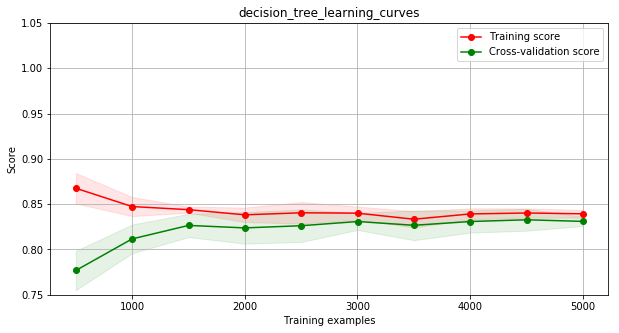

In [72]:
plot_learning_curve(estimator=dt,title='decision_tree_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

In [77]:
#predicting validation labels
dt.fit(full_train_x,train_y)
dt_predictions_val=dt.predict(full_val_x)
print('Decision tree classification report\n\n')
print(classification_report(val_y,dt_predictions_val))
print('accuracy of model is:',accuracy_score(val_y,dt_predictions_val))

Decision tree classification report


              precision    recall  f1-score   support

          No       0.83      0.99      0.90       889
         Yes       0.83      0.13      0.23       215

    accuracy                           0.83      1104
   macro avg       0.83      0.56      0.57      1104
weighted avg       0.83      0.83      0.77      1104

accuracy of model is: 0.8260869565217391


## Random forest


In [78]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [0]:
#creating parameter grid for random search
RF_grid_forest_1={'criterion':['gini','entropy'],
      'n_estimators':np.arange(5,200,1),
      'max_depth':np.arange(5,20,1),
      'min_samples_split':np.arange(0.001,0.1,0.01),
      'max_features':['log2','sqrt','auto'],    
      'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
}


In [83]:
#getting best parameters form random search
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=RF_grid_forest_1,n_iter=1000,n_jobs=-1,cv=3,verbose=1)
rf_random.fit(full_train_x,train_y)
rf_random.best_params_

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 11.3min finished


{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'min_samples_split': 0.001,
 'min_weight_fraction_leaf': 0.001,
 'n_estimators': 140}

In [0]:
rf=RandomForestClassifier(criterion='entropy',max_depth= 14,max_features= 'auto',min_samples_split= 0.001,min_weight_fraction_leaf= 0.001,n_estimators=140)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

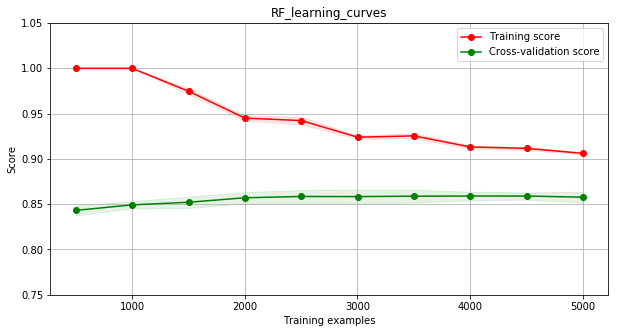

In [85]:
plot_learning_curve(estimator=rf,title='RF_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

In [0]:
RF_grid_forest_2={'criterion':['entropy'],
      'n_estimators':(135,140,145,150),
      'max_depth':(12,13,14,15,16),
      'min_samples_split':np.arange(0.001,0.01,0.005),
      'max_features':['log2','auto'],    
      'min_weight_fraction_leaf':np.arange(0.0001,0.1,0.005)
}

In [92]:
rf=RandomForestClassifier()
grid_search_rf=GridSearchCV(estimator=rf,param_grid = RF_grid_forest_2,cv=3,n_jobs=-1,verbose=1)
grid_search_rf.fit(full_train_x,train_y)
grid_search_rf.best_params_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed: 33.0min finished


{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'min_samples_split': 0.001,
 'min_weight_fraction_leaf': 0.0001,
 'n_estimators': 135}

In [103]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=135,max_depth=16,min_samples_split=0.001,max_features='auto',min_weight_fraction_leaf=0.0001)
rf.fit(full_train_x,train_y)
predictions=rf.predict(full_val_x)
print(classification_report(val_y,predictions))
print(accuracy_score(val_y,predictions))

              precision    recall  f1-score   support

          No       0.87      0.97      0.92       889
         Yes       0.76      0.38      0.51       215

    accuracy                           0.86      1104
   macro avg       0.81      0.68      0.71      1104
weighted avg       0.85      0.86      0.84      1104

0.8559782608695652


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

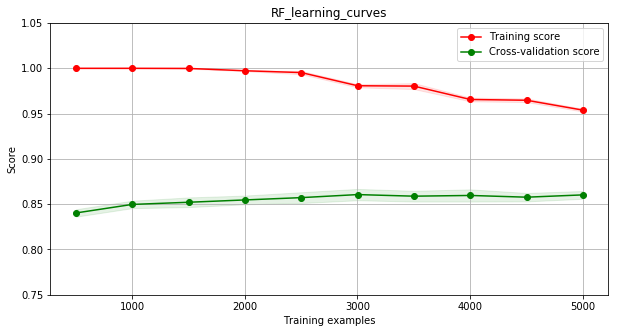

In [105]:
plot_learning_curve(estimator=rf,title='RF_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

## Gradient Boosting classifier

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)>

In [0]:
gbc_param_grid_1={
    'n_estimators':np.arange(50,200,10),
    'learning_rate':np.arange(0.01,0.3,0.01),
    'subsample':np.arange(0.5,1.0,0.1),
    'max_depth':np.arange(2,7,1),
    'max_features':['sqrt','log2']
}

In [114]:
random_gbc=RandomizedSearchCV(estimator=gbc,param_distributions=gbc_param_grid_1,n_jobs=-1,n_iter=1500,verbose=1)
random_gbc.fit(full_train_x,train_y)
random_gbc.best_params_

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 25.0min finished


{'learning_rate': 0.04,
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 180,
 'subsample': 0.7}

In [0]:
gradient_boosting=GradientBoostingClassifier(learning_rate= 0.04,max_depth= 6,max_features= 'sqrt',n_estimators= 180,subsample= 0.7)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

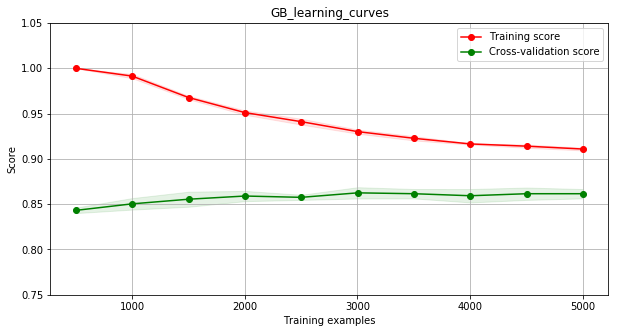

In [119]:
plot_learning_curve(estimator=gradient_boosting,title='GB_learning_curves',X=full_train_x,y=train_y,ylim=(0.75,1.05),cv=5)

In [0]:
gbc=GradientBoostingClassifier()
gbc_param_grid_2={
    'n_estimators':(160,170,175,180,185,190,200),
    'learning_rate':np.arange(0.01,0.1,0.005),
    'subsample':np.arange(0.5,0.9,0.05),
    'max_depth':(5,6,7),
    'max_features':['sqrt']
}

In [0]:
grid_search_gbc=GridSearchCV(estimator=gbc,param_grid=gbc_param_grid_2,n_jobs=-1,cv=3,verbose=1)
grid_search_gbc.fit(full_train_x,train_y)
grid_search_gbc.best_params_

Fitting 3 folds for each of 3024 candidates, totalling 9072 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.2min
